In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('retail_sales_dataset.csv')

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 521 to 649
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 78.1+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
df = df.drop(['Customer ID', 'Transaction ID'], axis=1)

In [8]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,2023-01-01,Male,46,Beauty,3,500,1500
179,2023-01-01,Male,41,Clothing,3,300,900
558,2023-01-01,Female,40,Clothing,4,300,1200
302,2023-01-02,Male,19,Electronics,3,30,90
978,2023-01-02,Female,19,Beauty,1,25,25


In [9]:
df["lag_1"] = df["Total Amount"].shift(1)
df["lag_7"] = df["Total Amount"].shift(7)

In [10]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,lag_1,lag_7
521,2023-01-01,Male,46,Beauty,3,500,1500,NaN,NaN
179,2023-01-01,Male,41,Clothing,3,300,900,1500.0,NaN
558,2023-01-01,Female,40,Clothing,4,300,1200,900.0,NaN
302,2023-01-02,Male,19,Electronics,3,30,90,1200.0,NaN
978,2023-01-02,Female,19,Beauty,1,25,25,90.0,NaN


In [11]:
# Group by date
daily_sales = df.groupby("Date").agg({
    "Total Amount": "sum"
}).reset_index()

In [12]:

daily_sales["lag_1"] = daily_sales["Total Amount"].shift(1)
daily_sales["lag_7"] = daily_sales["Total Amount"].shift(7)

In [13]:
daily_sales.head()

,Date,Total Amount,lag_1,lag_7
0,2023-01-01,3600,NaN,NaN
1,2023-01-02,1765,3600.0,NaN
2,2023-01-03,600,1765.0,NaN
3,2023-01-04,1240,600.0,NaN
4,2023-01-05,1100,1240.0,NaN


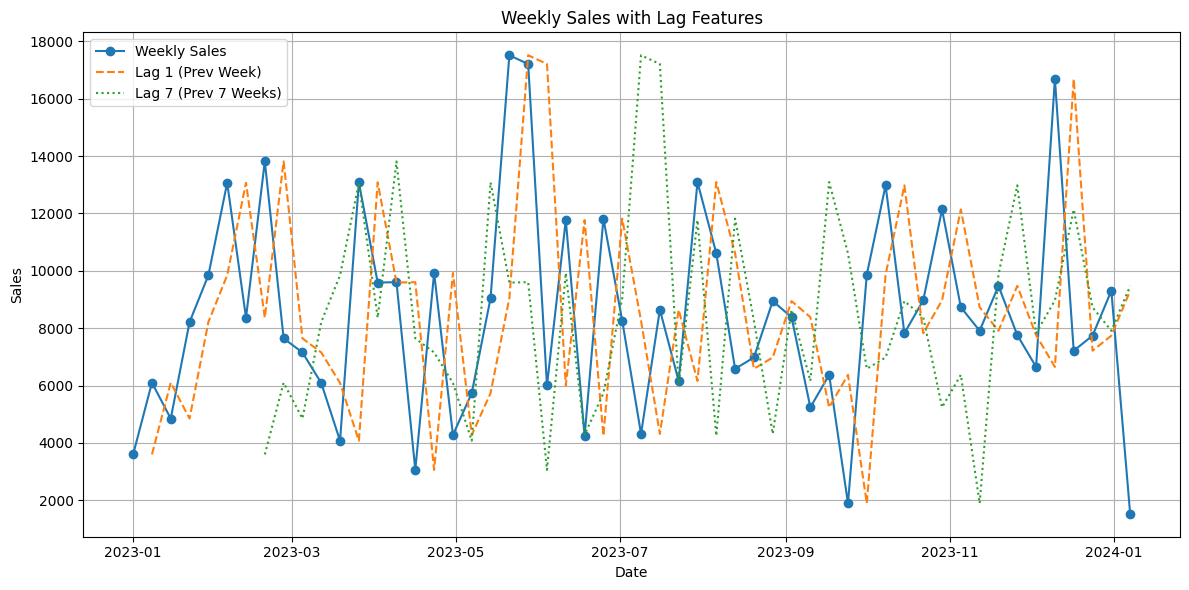

In [14]:
# Weekly sales banaye
weekly_sales = daily_sales.resample("W", on="Date")["Total Amount"].sum().reset_index()

# Lag features (weekly)
weekly_sales["lag_1"] = weekly_sales["Total Amount"].shift(1)   # Previous week
weekly_sales["lag_7"] = weekly_sales["Total Amount"].shift(7)   # Previous 7 weeks

# Plot
plt.figure(figsize=(12,6))
plt.plot(weekly_sales["Date"], weekly_sales["Total Amount"], marker="o", label="Weekly Sales")
plt.plot(weekly_sales["Date"], weekly_sales["lag_1"], linestyle="--", label="Lag 1 (Prev Week)")
plt.plot(weekly_sales["Date"], weekly_sales["lag_7"], linestyle=":", label="Lag 7 (Prev 7 Weeks)")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Weekly Sales with Lag Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,lag_1,lag_7
521,2023-01-01,Male,46,Beauty,3,500,1500,NaN,NaN
179,2023-01-01,Male,41,Clothing,3,300,900,1500.0,NaN
558,2023-01-01,Female,40,Clothing,4,300,1200,900.0,NaN
302,2023-01-02,Male,19,Electronics,3,30,90,1200.0,NaN
978,2023-01-02,Female,19,Beauty,1,25,25,90.0,NaN


In [16]:
weekly_sales

,Date,Total Amount,lag_1,lag_7
0,2023-01-01,3600,NaN,NaN
1,2023-01-08,6100,3600.0,NaN
2,2023-01-15,4850,6100.0,NaN
3,2023-01-22,8215,4850.0,NaN
4,2023-01-29,9845,8215.0,NaN
5,2023-02-05,13070,9845.0,NaN
6,2023-02-12,8365,13070.0,NaN
7,2023-02-19,13815,8365.0,3600.0
8,2023-02-26,7645,13815.0,6100.0
9,2023-03-05,7155,7645.0,4850.0
